<a href="https://colab.research.google.com/github/shhyunn/project_rp/blob/main/%EB%AC%B8%ED%99%94%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EC%A0%9C_2021310932_%EC%9E%84%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#계정마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#필요한 모듈 불러오기
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
#데이터 불러오기-타임스 고등교육 세계 대학 순위
times_df=pd.read_csv('/content/drive/MyDrive/문화데이터와머신러닝/기말과제/timesData.csv', thousands = ',',encoding='UTF-8')
times_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8%,28 : 72,2016


In [ ]:
#타임스 대학순위 분석_랭킹순위예측
#보팅앙상블 수치예측실습
#데이터 전처리
times_df['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
       'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

In [ ]:
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memor

In [ ]:
times_df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [ ]:
#결측값 확인
times_df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [ ]:
#결측값 제거
#times_df=times_df.drop('female_male_ratio',axis=1)
times_df=times_df.dropna()
#times_df['student_staff_ratio']=times_df['student_staff_ratio'].dropna()
#times_df['international_students']=times_df['international_students'].dropna()
#female_male_ratio는 사용 x

In [ ]:
times_df.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [ ]:
times_df['international']=times_df['international'].replace('-',0)
times_df['international_students']=times_df['international_students'].str.replace('%', '').astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
times_df=times_df[~times_df['world_rank'].str.contains("-", na=False, case=False)]
times_df['world_rank']=times_df['world_rank'].str.replace('=', '').astype('int64')
times_df['world_rank']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1         2
2         3
3         4
4         5
5         6
       ... 
1998    196
1999    196
2000    198
2001    199
2002    200
Name: world_rank, Length: 1077, dtype: int64

In [ ]:
times_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1 to 2002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1077 non-null   int64  
 1   university_name         1077 non-null   object 
 2   country                 1077 non-null   object 
 3   teaching                1077 non-null   float64
 4   international           1077 non-null   object 
 5   research                1077 non-null   float64
 6   citations               1077 non-null   float64
 7   income                  1077 non-null   object 
 8   total_score             1077 non-null   object 
 9   num_students            1077 non-null   float64
 10  student_staff_ratio     1077 non-null   float64
 11  international_students  1077 non-null   int64  
 12  female_male_ratio       1077 non-null   object 
 13  year                    1077 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memor

In [ ]:
times_df['teaching']=times_df['teaching'].astype('int64')
times_df['international']=times_df['international'].astype('float64')
times_df['international']=times_df['international'].astype('int64')
times_df['research']=times_df['research'].astype('int64')
times_df['citations']=times_df['citations'].astype('int64')
times_df['num_students']=times_df['num_students'].astype('int64')
times_df['student_staff_ratio']=times_df['student_staff_ratio'].astype('int64')
times_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1 to 2002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   world_rank              1077 non-null   int64 
 1   university_name         1077 non-null   object
 2   country                 1077 non-null   object
 3   teaching                1077 non-null   int64 
 4   international           1077 non-null   int64 
 5   research                1077 non-null   int64 
 6   citations               1077 non-null   int64 
 7   income                  1077 non-null   object
 8   total_score             1077 non-null   object
 9   num_students            1077 non-null   int64 
 10  student_staff_ratio     1077 non-null   int64 
 11  international_students  1077 non-null   int64 
 12  female_male_ratio       1077 non-null   object
 13  year                    1077 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 126.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#독립변수 및 종속변수 데이터 지정
X=times_df[['teaching', 'international','research', 'citations','num_students',
       'student_staff_ratio', 'international_students','year']]
Y=times_df['world_rank']

In [ ]:
#데이터 분할 및 표준화
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

In [ ]:
#모형학습 및 예측
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#단일 모형 객체 생성(svr모형, 인공신경망, 의사결정나무, k최근접이웃)
svr=SVR()
mlp=MLPRegressor(random_state=0)
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()

model=VotingRegressor(estimators=[('SVR',svr),('MLP',mlp),('DT',dt),('KNN',knn)])

model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [ 84.10260434 101.046322    17.48508135 125.18574058  36.21250413
  20.19422448  98.11955056  21.03089253 127.04101962 155.91921997
  19.53697604  37.58614195  98.17142265  37.51621811  46.33263535
 124.28904543 133.57589199 104.48242073  50.21671394  88.00731433
 111.64785773 171.55624585 129.21675477 148.71390773 162.74771322
 121.75183938 140.6551327  100.61499297  22.96696465  46.96915102
 157.23673632  27.15987436 110.93705952 116.10485058  19.42992101
  82.57339449 133.99324995 130.43529765 105.66096207 177.79487885
 109.10781567 101.71030444 129.77019454 105.09907988 151.88206719
  86.937048    51.95984697 137.88310707 155.40593679 108.76300036
  66.33202748 108.64500553  77.79852474 159.68850639  28.37384068
  14.80431467  32.80623359  99.06029388 153.30587941 108.5733303
 155.94218495  22.19957423 155.31210925 100.31985707  28.49387487
  45.00303061 157.08045126  56.94303547  11.01613777 154.34385381
 144.20170078  11.70066973 123.58388327  55.76127887  93.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#보팅 모형의 훈련 a및 테스트 결정계수
model.fit(X_train, Y_train)
print('Voting 앙상블 훈련 결정계수: {0:.3f}'.format(model.score(X_train,Y_train)))
print('Voting 앙상블 테스트 결정계수: {0:.3f}'.format(model.score(X_test,Y_test)))
times_vote=model.score(X_test,Y_test)
times_vote_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))
#개별모형의 훈련 및 테스트결정계수
Regressors=[svr,mlp,dt,knn]
i=0
times_list=[]
times_sub_list=[]
for Regressor in Regressors:
  Regressor.fit(X_train, Y_train)
  class_name=Regressor.__class__.__name__
  print('{0} 훈련 결정계수: {1:.3f}'.format(class_name,Regressor.score(X_train, Y_train)))
  print('{0} 테스트 결정계수: {1:.3f}'.format(class_name,Regressor.score(X_test, Y_test)))
  times_list.append(Regressor.score(X_test, Y_test))
  times_sub_list.append(abs(Regressor.score(X_test,Y_test)-Regressor.score(X_train,Y_train)))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Voting 앙상블 훈련 결정계수: 0.947
Voting 앙상블 테스트 결정계수: 0.926
SVR 훈련 결정계수: 0.712
SVR 테스트 결정계수: 0.734
MLPRegressor 훈련 결정계수: 0.891
MLPRegressor 테스트 결정계수: 0.898
DecisionTreeRegressor 훈련 결정계수: 1.000
DecisionTreeRegressor 테스트 결정계수: 0.876
KNeighborsRegressor 훈련 결정계수: 0.927
KNeighborsRegressor 테스트 결정계수: 0.901


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#모형평가
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE: {:.3f}'.format(rmse))
times_vote_rmse=rmse

RMSE: 15.236


In [ ]:
#타임스 대학순위 분석_랭킹순위예측
#랜덤포레스트 수치예측실습
X=times_df[['teaching', 'international','research', 'citations','num_students',
       'student_staff_ratio', 'international_students','year']]
Y=times_df['world_rank']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
#모형 학습 및 예측
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0, n_estimators=100, max_depth=4)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)


In [ ]:
#모형평가: 결정계수 평가
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수 :{:.3f}'.format(model.score(X_test, Y_test)))
times_random=model.score(X_test,Y_test)
times_random_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))

학습용 데이터 세트 결정계수: 0.903
평가용 데이터 세트 결정계수 :0.895


In [ ]:
#모형평가: rmse평가
rmse=sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))
times_random_rmse=rmse

RMSE: 18.218


In [ ]:
#변수 중요도 출력
feature_name=X.columns
feature_importances=model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.6114814185152648, 'research'),
 (0.1939292585731261, 'teaching'),
 (0.18867657296296272, 'citations'),
 (0.0023108095638712167, 'international'),
 (0.0012241553567158775, 'international_students'),
 (0.0010392744244335594, 'student_staff_ratio'),
 (0.0006742435340001643, 'year'),
 (0.0006642670696256121, 'num_students')]

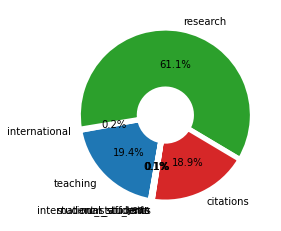

In [ ]:
import matplotlib.pyplot as plt

ratio = list(model.feature_importances_)
labels = list(feature_name)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
#타임스 대학순위 분석_랭킹순위예측
#그래디언트부스팅 수치예측실습
X=times_df[['teaching', 'international','research', 'citations','num_students',
       'student_staff_ratio', 'international_students','year']]
Y=times_df['world_rank']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
#모형 학습 예측
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(random_state=0, max_depth=2, n_estimators=100, learning_rate=0.1)

model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

In [ ]:
#모형평가: 결정계수 평가
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수 :{:.3f}'.format(model.score(X_test, Y_test)))
times_gd=model.score(X_test,Y_test)
times_gd_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))

학습용 데이터 세트 결정계수: 0.951
평가용 데이터 세트 결정계수 :0.936


In [ ]:
#모형평가: rmse평가
rmse=sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))
times_gd_rmse=rmse

RMSE: 14.243


In [ ]:
#변수 중요도 출력
feature_name=X.columns
feature_importances=model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.4625367841105435, 'research'),
 (0.272719576472904, 'teaching'),
 (0.22707711913640147, 'citations'),
 (0.016682636198176608, 'year'),
 (0.014340326603058656, 'international'),
 (0.004142933869625591, 'international_students'),
 (0.001867032127091524, 'num_students'),
 (0.0006335914821987004, 'student_staff_ratio')]

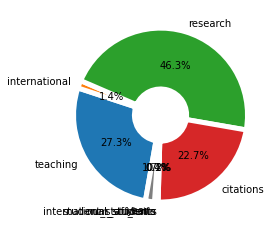

In [ ]:
import matplotlib.pyplot as plt

ratio = list(model.feature_importances_)
labels = list(feature_name)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#타임스 대학순위 분석_랭킹순위예측
#딥러닝_dnn(심층신경망) 수치예측실습
import numpy as np
X=times_df[['teaching', 'international','research', 'citations','num_students',
       'student_staff_ratio', 'international_students','year']]

#X=X.astype('float32')
#Y=np.log1p(times_df['world_rank'])
Y=times_df['world_rank']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화

scaler=StandardScaler().fit(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)
X_test


array([[ 0.46098484,  0.10285861, -0.54056655, ...,  0.83865382,
        -0.30947763, -0.85060481],
       [-0.21279978, -0.91079739, -0.9556026 , ..., -1.03401733,
        -0.30947763,  1.44511356],
       [ 1.74730092,  1.66941789,  2.00152928, ..., -0.20171904,
         1.60222587,  0.87118396],
       ...,
       [-0.51906551, -0.58827048,  0.03010803, ...,  1.87902668,
        -1.07415903, -0.85060481],
       [-0.39655922, -1.64800176, -0.38492803, ...,  1.35884025,
        -1.07415903, -1.42453441],
       [ 0.95101001, -1.18724903,  0.44514408, ..., -0.61786819,
        -1.07415903,  0.29725437]])

In [ ]:
#필요한 모듈 불러오기
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

np.random.seed(0)
tf.random.set_seed(0)

model=keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss="mse",optimizer='adam')

#모형 학습 및 예측
history=model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose=0)
Y_pred=np.round(model.predict(X_test, verbose=0),3)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [[ 53.515]
 [123.658]
 [ 13.811]
 [137.673]
 [ 34.151]
 [ 16.762]
 [ 98.718]
 [ 23.224]
 [141.843]
 [190.376]
 [ 12.368]
 [ 46.167]
 [103.182]
 [ 33.935]
 [ 37.479]
 [132.787]
 [122.02 ]
 [121.878]
 [ 48.091]
 [ 78.991]
 [133.445]
 [174.479]
 [110.932]
 [145.54 ]
 [181.26 ]
 [132.739]
 [142.257]
 [109.032]
 [ 15.063]
 [ 31.313]
 [178.782]
 [ 23.337]
 [116.812]
 [127.716]
 [ 17.476]
 [ 82.628]
 [145.57 ]
 [137.884]
 [100.8  ]
 [201.241]
 [103.337]
 [107.305]
 [145.861]
 [ 97.126]
 [133.614]
 [ 64.891]
 [ 45.412]
 [155.634]
 [158.173]
 [101.109]
 [ 68.452]
 [104.393]
 [ 74.603]
 [169.003]
 [ 36.839]
 [ 11.91 ]
 [ 17.816]
 [ 97.057]
 [171.033]
 [ 90.055]
 [148.173]
 [ 19.231]
 [170.671]
 [ 98.488]
 [ 29.911]
 [ 37.416]
 [162.303]
 [ 50.051]
 [  7.375]
 [166.289]
 [143.607]
 [  5.443]
 [128.052]
 [ 45.985]
 [ 82.303]
 [ 75.793]
 [110.138]
 [ 41.567]
 [111.504]
 [156.681]
 [ 24.366]
 [ 64.386]
 [163.13 ]
 [ 63.169]
 [183.257]
 [162.605]
 [ 90.067]
 [170.85 ]
 [156.213]
 

In [ ]:
#모형평가
train_score=model.evaluate(X_train, Y_train, verbose=0)
test_score=model.evaluate(X_test, Y_test, verbose=0)

print('학습용 데이터 세트 RMSE {:.3f}'.format(sqrt(train_score)))
print('평가용 데이터 세트 RMSE {:.3f}'.format(sqrt(test_score)))

times_dnn_rmse=sqrt(test_score)

학습용 데이터 세트 RMSE 16.303
평가용 데이터 세트 RMSE 15.449


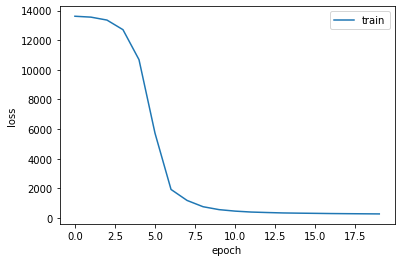

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [ ]:
#모형 재학습 및 예측
history=model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=0)
Y_pred=np.round(model.predict(X_test, verbose=0),3)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [[ 60.57 ]
 [126.186]
 [ 13.283]
 [136.242]
 [ 33.622]
 [ 19.811]
 [102.863]
 [ 27.752]
 [140.652]
 [191.16 ]
 [ 14.816]
 [ 45.898]
 [106.58 ]
 [ 35.397]
 [ 34.526]
 [143.946]
 [129.72 ]
 [125.124]
 [ 43.517]
 [ 77.903]
 [136.694]
 [183.881]
 [116.121]
 [151.346]
 [184.872]
 [132.108]
 [147.494]
 [109.933]
 [ 16.04 ]
 [ 30.69 ]
 [181.636]
 [ 21.926]
 [114.953]
 [125.241]
 [ 14.753]
 [ 76.936]
 [146.138]
 [136.002]
 [106.026]
 [202.987]
 [101.585]
 [109.952]
 [149.943]
 [ 99.362]
 [137.366]
 [ 64.965]
 [ 47.133]
 [156.782]
 [164.544]
 [ 99.409]
 [ 74.455]
 [106.174]
 [ 77.196]
 [170.686]
 [ 36.093]
 [ 11.432]
 [ 19.613]
 [ 96.672]
 [172.504]
 [ 95.002]
 [154.256]
 [ 22.987]
 [173.341]
 [101.502]
 [ 29.579]
 [ 41.998]
 [165.496]
 [ 44.642]
 [  6.651]
 [164.375]
 [147.779]
 [  3.918]
 [128.09 ]
 [ 44.927]
 [ 89.436]
 [ 81.094]
 [112.077]
 [ 42.109]
 [114.667]
 [155.047]
 [ 25.479]
 [ 63.814]
 [169.274]
 [ 65.422]
 [180.702]
 [167.309]
 [ 92.478]
 [168.749]
 [158.82 ]
 

In [ ]:
#모형평가
train_score=model.evaluate(X_train, Y_train, verbose=0)
test_score=model.evaluate(X_test, Y_test, verbose=0)

print('학습용 데이터 세트 RMSE {:.3f}'.format(sqrt(train_score)))
print('평가용 데이터 세트 RMSE {:.3f}'.format(sqrt(test_score)))

times_dnn_rmse=sqrt(test_score)

학습용 데이터 세트 RMSE 14.838
평가용 데이터 세트 RMSE 14.349


In [ ]:
#상하이 대학순위 분석_랭킹순위예측
#보팅앙상블 분류예측실습
sanghai_df=pd.read_csv('/content/drive/MyDrive/문화데이터와머신러닝/기말과제/shanghaiData.csv',encoding='UTF-8')
sanghai_df

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
...,...,...,...,...,...,...,...,...,...,...,...
4892,401-500,University of Trieste,11-20,NaN,0.0,0.0,5.0,10.9,25.1,20.1,2015
4893,401-500,University of Zaragoza,9-13,NaN,0.0,0.0,7.6,5.1,33.3,13.1,2015
4894,401-500,Utah State University,126-146,NaN,13.6,0.0,3.6,10.8,25.1,15.5,2015
4895,401-500,Vienna University of Technology,4-6,NaN,0.0,0.0,0.0,12.2,28.8,22.9,2015


In [ ]:
sanghai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB


In [ ]:
sanghai_df.columns

Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year'],
      dtype='object')

In [ ]:
#결측값 확인
sanghai_df.isnull().sum() #결측값 행이 과반수 이상이므로 total score은 제외

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [ ]:
#결측값이 많은 total_score 제거
sanghai_df=sanghai_df.drop('total_score',axis=1)
sanghai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   alumni           4896 non-null   float64
 4   award            4895 non-null   float64
 5   hici             4895 non-null   float64
 6   ns               4875 non-null   float64
 7   pub              4895 non-null   float64
 8   pcp              4895 non-null   float64
 9   year             4897 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 382.7+ KB


In [ ]:
#결측값 행 제거
sanghai_df=sanghai_df.dropna()
sanghai_df.isnull().sum()

world_rank         0
university_name    0
national_rank      0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
year               0
dtype: int64

In [ ]:
sanghai_df=sanghai_df[~sanghai_df['world_rank'].str.contains("-", na=False, case=False)]

In [ ]:
#데이터 유형 변경
sanghai_df['world_rank']=sanghai_df['world_rank'].astype('float64')
sanghai_df['world_rank']=sanghai_df['world_rank'].astype('int64')
sanghai_df['national_rank']=sanghai_df['national_rank'].astype('float64')
sanghai_df['national_rank']=sanghai_df['national_rank'].astype('int64')
sanghai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 4496
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       1101 non-null   int64  
 1   university_name  1101 non-null   object 
 2   national_rank    1101 non-null   int64  
 3   alumni           1101 non-null   float64
 4   award            1101 non-null   float64
 5   hici             1101 non-null   float64
 6   ns               1101 non-null   float64
 7   pub              1101 non-null   float64
 8   pcp              1101 non-null   float64
 9   year             1101 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 94.6+ KB


In [ ]:
#독립변수 및 종속변수 데이터 지정
X=sanghai_df[['national_rank', 'alumni','award', 'hici','ns',
       'pub', 'pcp','year']]
Y=sanghai_df['world_rank']

In [ ]:
#데이터 분할 및 표준화
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

In [ ]:

#모형학습 및 예측
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#단일 모형 객체 생성(svr모형, 인공신경망)
svr=SVR()
mlp=MLPRegressor(random_state=0)
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()

model=VotingRegressor(estimators=[('SVR',svr),('MLP',mlp),('DT',dt),('KNN',knn)])

model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [66.14734289 12.09935517 72.21080195 82.88928064 38.72064549  8.94743414
 59.00748118 85.22424707 36.46360219 73.69529497 79.24488415 12.3886916
 52.20668164  5.96850669 20.83666376 88.46226292 52.67364658 87.48821316
 85.23985041 22.87285853 14.61494681 50.15895246 15.07933791 79.96761963
  8.91695024 29.38338958  9.4073324  24.37232148 23.65871574 41.51222979
  9.03929235 87.83250904 69.72846241 49.16950905 28.11169414  7.07258762
 33.94008199 60.49581501 64.54912528 82.5000748  63.64046983 58.51413935
 67.63403204 88.45423126 22.73758855 84.32504128 89.8554445   9.67831467
 46.52698257 11.50009124 82.9782248  11.86150975 76.17462064 20.75849601
  8.13733343 30.32175234 86.48714268 45.88780219 91.77361502 15.19965259
 60.57167592 27.67637523 62.88138243 87.04286892  7.42311455 76.2353525
 27.16397863 53.71218927 70.48115612 69.92834589 61.70518657 18.33504754
 35.17469326 73.0068248  78.16353232 84.75234284 62.18536872 14.40664964
 34.77782095 82.11020617 69.72700

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#보팅 모형의 훈련 a및 테스트 결정계수
model.fit(X_train, Y_train)
print('Voting 앙상블 훈련 결정계수: {0:.3f}'.format(model.score(X_train,Y_train)))
print('Voting 앙상블 테스트 결정계수: {0:.3f}'.format(model.score(X_test,Y_test)))
sanghai_vote=model.score(X_test,Y_test)
sanghai_vote_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))
#개별모형의 훈련 및 테스트결정계수
Regressors=[svr,mlp,dt,knn]
i=0
sanghai_list=[]
sanghai_sub_list=[]
for Regressor in Regressors:
  Regressor.fit(X_train, Y_train)
  class_name=Regressor.__class__.__name__
  print('{0} 훈련 결정계수: {1:.3f}'.format(class_name,Regressor.score(X_train, Y_train)))
  print('{0} 테스트 결정계수: {1:.3f}'.format(class_name,Regressor.score(X_test, Y_test)))
  sanghai_list.append(Regressor.score(X_test, Y_test))
  sanghai_sub_list.append(abs(Regressor.score(X_test,Y_test)-Regressor.score(X_train,Y_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Voting 앙상블 훈련 결정계수: 0.982
Voting 앙상블 테스트 결정계수: 0.977
SVR 훈련 결정계수: 0.867
SVR 테스트 결정계수: 0.872
MLPRegressor 훈련 결정계수: 0.957
MLPRegressor 테스트 결정계수: 0.957
DecisionTreeRegressor 훈련 결정계수: 1.000
DecisionTreeRegressor 테스트 결정계수: 0.972
KNeighborsRegressor 훈련 결정계수: 0.982
KNeighborsRegressor 테스트 결정계수: 0.976


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#모형평가
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE: {:.3f}'.format(rmse))

sanghai_vote_rmse=rmse


RMSE: 4.468


In [ ]:
#상하이 대학순위 분석_랭킹순위예측
#랜덤포레스트 수치예측실습
#독립변수 및 종속변수 데이터 지정
X=sanghai_df[['national_rank', 'alumni','award', 'hici','ns',
       'pub', 'pcp','year']]
Y=sanghai_df['world_rank']

#데이터 분할
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
#모형 학습 및 예측
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0, n_estimators=100, max_depth=4)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

In [ ]:
#모형평가: 결정계수 평가
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수 :{:.3f}'.format(model.score(X_test, Y_test)))
sanghai_random=model.score(X_test, Y_test)
sanghai_random_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))

학습용 데이터 세트 결정계수: 0.944
평가용 데이터 세트 결정계수 :0.933


In [ ]:
#모형평가: rmse평가
rmse=sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

sanghai_random_rmse=rmse

RMSE: 7.691


In [ ]:
#변수 중요도 출력
feature_name=X.columns
feature_importances=model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.7488138794599274, 'ns'),
 (0.10033852182355797, 'hici'),
 (0.06359177810041083, 'national_rank'),
 (0.06023998383758863, 'award'),
 (0.011575837551600864, 'pub'),
 (0.011453143920062182, 'alumni'),
 (0.003888927680066406, 'pcp'),
 (9.79276267858083e-05, 'year')]

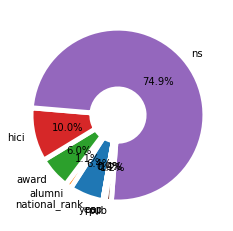

In [ ]:
import matplotlib.pyplot as plt

ratio = list(model.feature_importances_)
labels = list(feature_name)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
#상하이 대학순위 분석_랭킹순위예측
#그래디언트부스팅 수치예측실습
#독립변수 및 종속변수 데이터 지정
X=sanghai_df[['national_rank', 'alumni','award', 'hici','ns',
       'pub', 'pcp','year']]
Y=sanghai_df['world_rank']

#데이터 분할
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
#모형 학습 예측
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(random_state=0, max_depth=2, n_estimators=100, learning_rate=0.1)

model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
Y_pred

array([67.51282672, 14.3540348 , 73.25900195, 83.49006728, 40.08144032,
        4.62798868, 63.79952483, 92.60504252, 38.01389873, 73.54252434,
       78.53150713,  9.97190877, 49.06992801,  4.98632402, 23.44476771,
       91.72280762, 59.1140485 , 97.85850011, 93.37779697, 24.28390275,
       14.23806833, 45.65734169, 15.73669276, 85.71245106,  4.78466478,
       33.84749653,  9.8559423 , 21.49840357, 23.02063914, 48.92627678,
        8.2537571 , 92.49178889, 65.18723929, 45.59987029, 31.05473201,
        5.06743327, 38.18613135, 58.53771238, 63.45839253, 81.83307501,
       65.69642538, 58.68527852, 66.32086612, 92.01036241, 23.40555259,
       86.72447386, 92.21682136,  9.36393771, 46.47161103,  9.97190877,
       85.63342522,  3.35081046, 77.10070849, 23.46708083,  5.05449401,
       31.85982213, 87.73196009, 46.05129923, 92.17869311, 17.97998221,
       63.56560679, 31.05473201, 71.09630039, 92.40768245,  7.74702484,
       75.77807568, 26.29442964, 51.96464236, 69.51530323, 69.54

In [ ]:
#모형평가: 결정계수 평가
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수 :{:.3f}'.format(model.score(X_test, Y_test)))
sanghai_gd=model.score(X_test, Y_test)
sanghai_gd_sub=abs(model.score(X_test,Y_test)-model.score(X_train,Y_train))

학습용 데이터 세트 결정계수: 0.982
평가용 데이터 세트 결정계수 :0.975


In [ ]:
#모형평가: rmse평가
rmse=sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

sanghai_gd_rmse=rmse

RMSE: 4.664


In [ ]:
#변수 중요도 출력
feature_name=X.columns
feature_importances=model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.4681156359432098, 'ns'),
 (0.2928299611151867, 'hici'),
 (0.10245157180709842, 'award'),
 (0.07708605803530601, 'national_rank'),
 (0.03125844205296991, 'alumni'),
 (0.021793200857807234, 'pub'),
 (0.00620482995703428, 'pcp'),
 (0.00026030023138762844, 'year')]

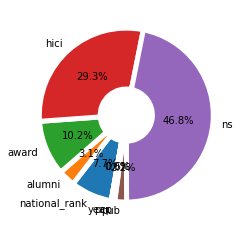

In [ ]:
import matplotlib.pyplot as plt

ratio = list(model.feature_importances_)
labels = list(feature_name)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
#상하이 대학순위 분석_랭킹순위예측
#딥러닝_dnn(심층신경망) 수치예측실습
import numpy as np
X=sanghai_df[['national_rank', 'alumni','award', 'hici','ns',
       'pub', 'pcp','year']]
Y=sanghai_df['world_rank']

#X=X.astype('float32')

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화
scaler=StandardScaler().fit(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)
X_test

array([[-0.82988495, -0.20218722,  0.26484048, ..., -0.33324875,
        -0.36741482,  0.0412237 ],
       [-0.22544737,  0.57482084,  0.36684579, ...,  1.12522093,
         0.40772236,  0.35550342],
       [-0.89032871,  1.20512109,  0.36220918, ..., -0.39806962,
         0.03189827, -0.27305602],
       ...,
       [-0.34633489,  0.2325026 ,  0.75168401, ...,  1.6194801 ,
        -0.07771709,  0.35550342],
       [-0.52766616,  2.38421724,  1.90156208, ...,  1.12522093,
        -0.02290941,  0.35550342],
       [ 0.19765894,  0.46614838,  0.4688511 , ...,  0.27444695,
        -0.30477747,  0.35550342]])

In [ ]:
#필요한 모듈 불러오기
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

np.random.seed(0)
tf.random.set_seed(0)

model=keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=8, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
#model.add(keras.layers.Dense(1,activation='sigmoid'))
model.add(keras.layers.Dense(1)) #수치 예측은 활성화함수가 필요하지 않음


model.compile(loss="mse",optimizer='adam')

#모형 학습 및 예측
history=model.fit(X_train, Y_train, epochs=20, validation_split=0.2, batch_size=64, verbose=0)
Y_pred=np.round(model.predict(X_test, verbose=0),3)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [[65.329]
 [ 8.007]
 [74.658]
 [79.176]
 [40.28 ]
 [ 6.66 ]
 [61.44 ]
 [93.022]
 [33.361]
 [74.296]
 [75.14 ]
 [11.517]
 [48.952]
 [ 4.999]
 [17.046]
 [91.263]
 [49.435]
 [87.184]
 [93.136]
 [27.909]
 [11.277]
 [53.692]
 [14.459]
 [84.094]
 [ 6.789]
 [27.441]
 [ 5.015]
 [21.69 ]
 [20.93 ]
 [39.571]
 [ 6.315]
 [94.514]
 [71.739]
 [51.302]
 [27.088]
 [ 5.05 ]
 [33.072]
 [57.837]
 [67.608]
 [82.974]
 [66.8  ]
 [60.439]
 [60.45 ]
 [91.712]
 [12.405]
 [89.157]
 [95.787]
 [ 5.184]
 [49.452]
 [ 9.435]
 [83.75 ]
 [ 7.61 ]
 [77.361]
 [12.043]
 [ 7.15 ]
 [33.26 ]
 [86.64 ]
 [40.945]
 [90.98 ]
 [10.716]
 [57.708]
 [26.112]
 [61.324]
 [92.693]
 [ 4.709]
 [86.28 ]
 [13.863]
 [53.894]
 [75.151]
 [66.415]
 [65.347]
 [12.374]
 [36.133]
 [76.457]
 [87.762]
 [90.883]
 [70.534]
 [13.921]
 [30.439]
 [82.715]
 [71.65 ]
 [60.798]
 [76.536]
 [49.677]
 [57.217]
 [83.156]
 [63.158]
 [33.099]
 [87.266]
 [38.525]
 [16.268]
 [11.555]
 [20.2  ]
 [ 8.454]
 [79.445]
 [59.012]
 [17.092]
 [81.905]


In [ ]:
'''
#학습과정 시각화를 통한 학습 횟수 조정
import matplotlib.pyplot as plt
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower right')

acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'],'g',label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')
plt.show()
'''

"\n#학습과정 시각화를 통한 학습 횟수 조정\nimport matplotlib.pyplot as plt\nfig, loss_ax=plt.subplots()\nacc_ax=loss_ax.twinx()\n\nloss_ax.plot(history.history['loss'],'y',label='train loss')\nloss_ax.plot(history.history['val_loss'],'r',label='val loss')\nloss_ax.set_xlabel('epoch')\nloss_ax.set_ylabel('loss')\nloss_ax.legend(loc='lower right')\n\nacc_ax.plot(history.history['accuracy'],'b',label='train acc')\nacc_ax.plot(history.history['val_accuracy'],'g',label='val acc')\nacc_ax.set_ylabel('accuracy')\nacc_ax.legend(loc='upper right')\nplt.show()\n"

In [ ]:
#모형평가
train_score=model.evaluate(X_train, Y_train, verbose=0)
test_score=model.evaluate(X_test, Y_test, verbose=0)

print('학습용 데이터 세트 RMSE {:.3f}'.format(sqrt(train_score)))
print('평가용 데이터 세트 RMSE {:.3f}'.format(sqrt(test_score)))

sanghai_dnn_rmse=sqrt(test_score)


학습용 데이터 세트 RMSE 4.995
평가용 데이터 세트 RMSE 5.186


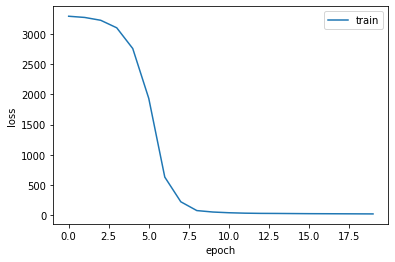

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [ ]:
#모형 재학습 및 예측
history=model.fit(X_train, Y_train, epochs=8, validation_split=0.2, batch_size=64, verbose=0)
Y_pred=np.round(model.predict(X_test, verbose=0),3)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [[65.042]
 [ 8.884]
 [74.38 ]
 [78.931]
 [40.264]
 [ 5.678]
 [61.489]
 [94.295]
 [33.255]
 [74.203]
 [74.765]
 [12.54 ]
 [49.594]
 [ 3.964]
 [17.011]
 [91.035]
 [50.647]
 [88.985]
 [94.632]
 [27.634]
 [12.443]
 [51.835]
 [15.682]
 [84.489]
 [ 5.787]
 [27.202]
 [ 5.237]
 [22.583]
 [20.352]
 [38.926]
 [ 6.973]
 [94.086]
 [71.197]
 [51.366]
 [28.321]
 [ 4.186]
 [33.209]
 [58.053]
 [67.939]
 [82.404]
 [67.329]
 [60.621]
 [61.469]
 [92.356]
 [13.397]
 [88.781]
 [95.927]
 [ 5.105]
 [49.055]
 [10.216]
 [84.95 ]
 [ 5.442]
 [78.922]
 [13.322]
 [ 6.411]
 [34.423]
 [85.75 ]
 [40.965]
 [90.752]
 [12.106]
 [59.131]
 [27.25 ]
 [60.054]
 [92.587]
 [ 4.569]
 [85.627]
 [14.515]
 [52.604]
 [74.296]
 [67.982]
 [64.272]
 [13.568]
 [34.935]
 [76.671]
 [91.25 ]
 [90.144]
 [73.422]
 [14.58 ]
 [30.281]
 [83.148]
 [71.257]
 [59.976]
 [77.986]
 [50.032]
 [58.399]
 [83.44 ]
 [63.544]
 [31.998]
 [87.45 ]
 [38.097]
 [16.711]
 [12.638]
 [20.961]
 [ 7.726]
 [78.632]
 [58.857]
 [17.187]
 [82.54 ]


In [ ]:
#모형평가
train_score=model.evaluate(X_train, Y_train, verbose=0)
test_score=model.evaluate(X_test, Y_test, verbose=0)

print('학습용 데이터 세트 RMSE {:.3f}'.format(sqrt(train_score)))
print('평가용 데이터 세트 RMSE {:.3f}'.format(sqrt(test_score)))

sanghai_dnn_rmse=sqrt(test_score)

학습용 데이터 세트 RMSE 4.448
평가용 데이터 세트 RMSE 4.687


In [ ]:
#타임즈 및 상하이 대학순위 모델 결과
data_a=pd.DataFrame(data={'type':['타임즈','상하이'],'voting ensemble':[times_vote,sanghai_vote],'svr':[times_list[0],sanghai_list[0]],'mlp_regressor':[times_list[1],sanghai_list[1]],'decisiontree':[times_list[2],sanghai_list[2]],'k_neighbors':[times_list[3],sanghai_list[3]],'randomforest':[times_random,sanghai_random],'gradient_boosting':[times_gd,sanghai_gd]})
data_a


,type,voting ensemble,svr,mlp_regressor,decisiontree,k_neighbors,randomforest,gradient_boosting
0,타임즈,0.926381,0.733526,0.897891,0.876440,0.900871,0.895437,0.936086
1,상하이,0.976915,0.872249,0.956693,0.972042,0.975705,0.932658,0.975237


In [ ]:
#타임즈 및 상하이 대학순위 모델 결과
data_b=pd.DataFrame(data={'type':['타임즈 rmse','상하이 rmse'],'voting ensemble':[times_vote_rmse,sanghai_vote_rmse],'randomforest':[times_random_rmse,sanghai_random_rmse],'gradient_boosting':[times_gd_rmse,sanghai_gd_rmse], 'dnn':[times_dnn_rmse,sanghai_dnn_rmse]})
data_b

,type,voting ensemble,randomforest,gradient_boosting,dnn
0,타임즈 rmse,15.236093,18.217742,14.242998,14.348814
1,상하이 rmse,4.467925,7.690771,4.663676,4.687186


In [ ]:
data_c=pd.DataFrame(data={'type':['타임즈','상하이'],'voting ensemble':[times_vote_sub,sanghai_vote_sub],'svr':[times_sub_list[0],sanghai_sub_list[0]],'mlp_regressor':[times_sub_list[1],sanghai_sub_list[1]],'decisiontree':[times_sub_list[2],sanghai_sub_list[2]],'k_neighbors':[times_sub_list[3],sanghai_sub_list[3]],'randomforest':[times_random_sub,sanghai_random_sub],'gradient_boosting':[times_gd_sub,sanghai_gd_sub]})
data_c

,type,voting ensemble,svr,mlp_regressor,decisiontree,k_neighbors,randomforest,gradient_boosting
0,타임즈,0.020203,0.021752,0.007019,0.123560,0.026000,0.007064,0.014824
1,상하이,0.005223,0.004924,0.000734,0.027958,0.006402,0.011214,0.007256
